In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV



from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold


from sklearn.metrics import confusion_matrix

In [181]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [182]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [183]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [184]:
df[df.Survived.notnull()].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [185]:
print('perecentage of male:', train_df.loc[df.Sex == 'male']['Sex'].count() / len(train_df) * 100, '%')

perecentage of male: 64.75869809203144 %


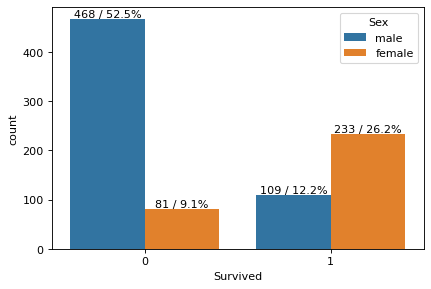

In [186]:
total = train_df.Survived.count()
plt.figure(dpi=80)
ax = sns.countplot(x="Survived", hue="Sex", data=train_df)
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total * 100:2.1f}%', va='center', ha='center', size=10)

In [187]:
print('percentage of female survivors:', (train_df.loc[(train_df.Sex == 'female') & (train_df.Survived == 1)]['Sex'].count() / \
                                        len(train_df.loc[train_df.Sex == 'female']['Sex']) * 100), '%')

percentage of female survivors: 74.20382165605095 %


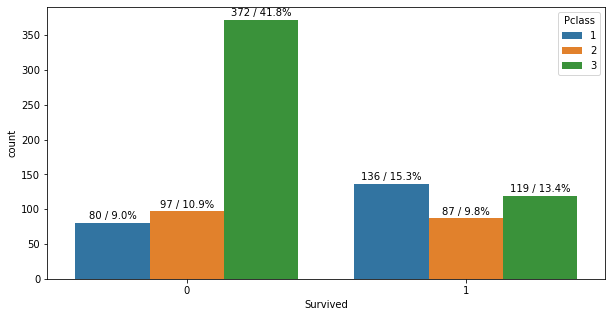

In [188]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='Survived', hue='Pclass', data=train_df)
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total * 100:2.1f}%', va='center', ha='center', size=10)

<AxesSubplot:xlabel='Survived', ylabel='count'>

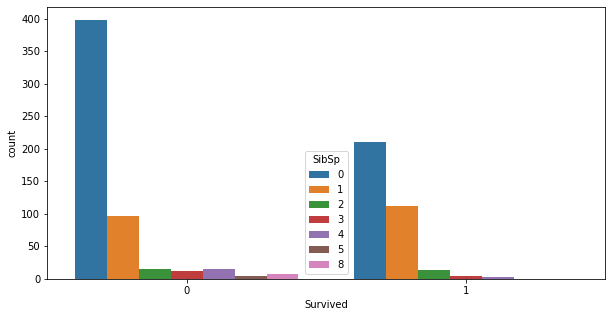

In [189]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='SibSp', data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

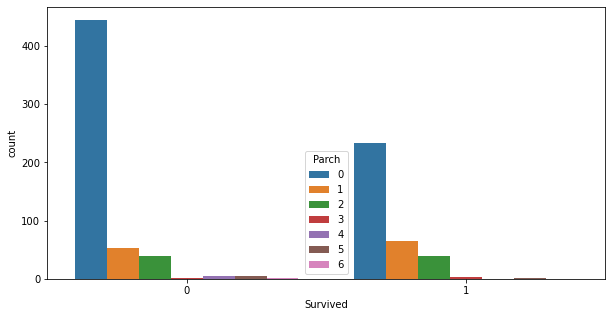

In [190]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Parch', data=train_df)

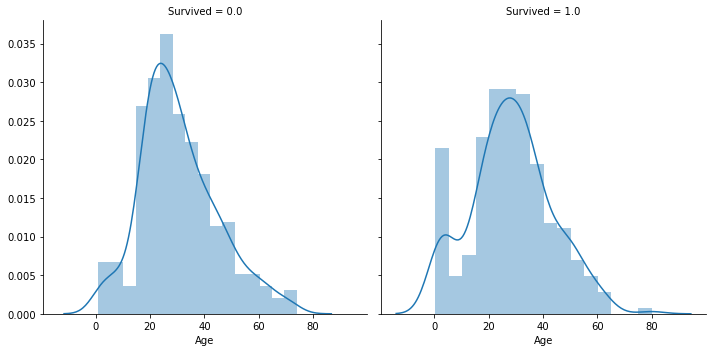

In [191]:
sns.FacetGrid(df[df.Survived.notnull()], col='Survived', size=5).map(sns.distplot, "Age")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

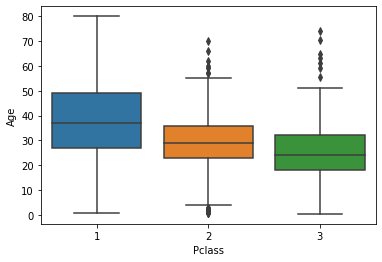

In [192]:
sns.boxplot(x='Pclass', y='Age', data=df[df.Survived.notnull()])

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

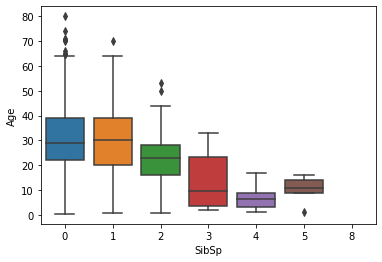

In [193]:
sns.boxplot(x='SibSp', y='Age', data=df[df.Survived.notnull()])


<AxesSubplot:xlabel='Parch', ylabel='Age'>

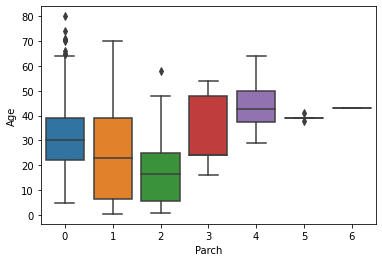

In [194]:
sns.boxplot(x='Parch', y='Age', data=df[df.Survived.notnull()])

In [195]:
def new_col(df):
    df['Alone'] = df['SibSp'] + df['Parch']
    binn = [None] * len(df)
    
    for i in range(len(df)):
        if df.Alone[i] in [0]:
            binn[i] = 'Alone'
        elif df.Alone[i] in [_ for _ in range(1, 11)]:
            binn[i] = 'Not Alone'
    df['Alone'] = binn

In [196]:
new_col(df)

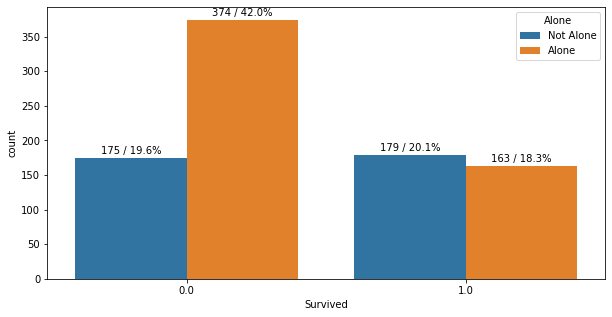

In [197]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Survived', hue='Alone', data=df[df.Survived.notnull()])
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total * 100:2.1f}%', va='center', ha='center', size=10)

In [198]:
def fil_age(column):
    Age = column[0]
    Pclass = column[1]
    
    if (pd.isna(Age)):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [199]:
df['Age'] = df[['Age', 'Pclass']].apply(fil_age, axis=1)

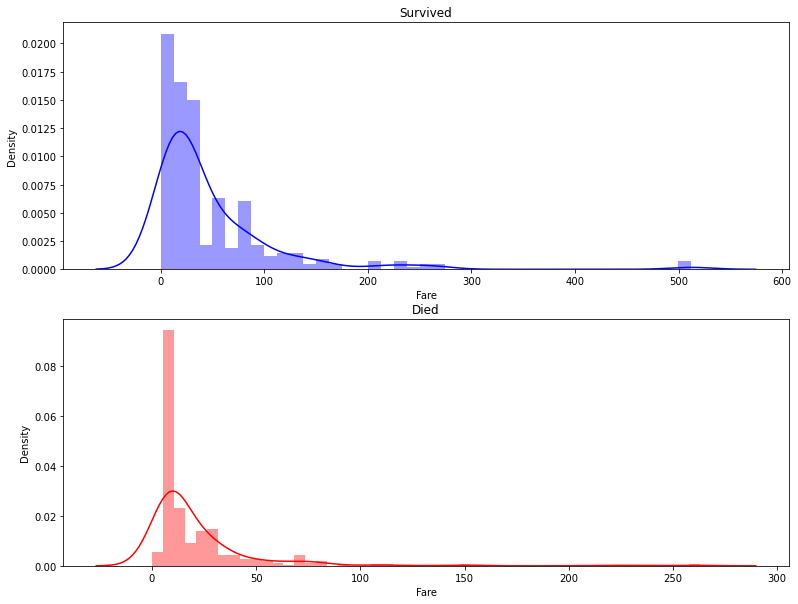

In [200]:
fig = plt.figure(figsize=(13, 10))
ax_1 = fig.add_subplot(2, 1, 1)
sns.distplot(df[df.Survived.notnull()].loc[(df.Survived == 1)]["Fare"], color='blue')
plt.title('Survived')
ax_2 = fig.add_subplot(2, 1, 2)
sns.distplot(df[df.Survived.notnull()].loc[(df.Survived == 0)]["Fare"], color='red')
plt.title('Died')
plt.show()

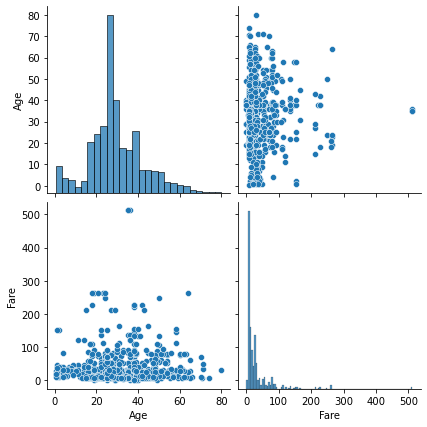

In [201]:
sns.pairplot(df[df.Survived.notnull()][['Age', 'Fare']], size=3)

In [202]:
print(df.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34' 'A9' 'C31' 'B61' 'C5

In [203]:
df.Sex = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
df.Alone = df.Alone.apply(lambda x: 1 if x == 'Alone' else 0)
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(df_title)
df.drop(columns='Name', inplace=True)
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col',\
                                    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df['Title'] = df['Title'].astype(int)

<AxesSubplot:xlabel='Title', ylabel='count'>

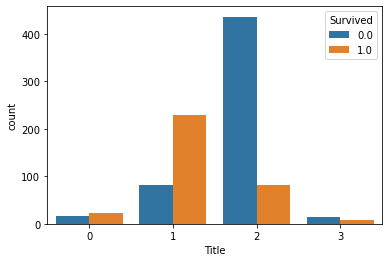

In [204]:
sns.countplot(x='Title', hue='Survived', data=df[df.Survived.notnull()])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

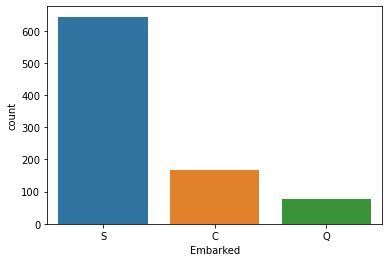

In [205]:
sns.countplot(x='Embarked', data=df[df.Survived.notnull()])

In [206]:
df["Embarked"].fillna("S", inplace = True) 
embark1 = pd.get_dummies(df['Embarked'])
df = pd.concat([df, embark1],axis=1)

In [214]:
train = df[df.Survived.notnull()]
test = df[~df.Survived.notnull()]

In [216]:
Ticket1 = []
for i in list(train.Ticket):
    if not i.isdigit() :
        Ticket1.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket1.append("X")
train["Ticket"] = Ticket1

In [218]:
train = pd.get_dummies(train, columns = ["Ticket"], prefix="T")

In [220]:
train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'], axis = 1)

In [225]:
train.drop(columns=['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Embarked'], inplace=True)

In [226]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Alone,Title,C,Q,S,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
0,0.0,3,1,22.0,7.2500,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,38.0,71.2833,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,0,26.0,7.9250,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1,0,35.0,53.1000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3,1,35.0,8.0500,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [222]:
test['Fare'] = test['Fare'].apply(lambda x: test['Fare'].mean() if pd.isna(x) else x)


In [223]:
Ticket2 = []
for i in list(test.Ticket):
    if not i.isdigit() :
        Ticket2.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket2.append("X")
test["Ticket"] = Ticket2

pas_id = test.PassengerId

test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)
test.drop(columns=['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Embarked'], inplace=True)

In [224]:
test.head()

,Survived,Pclass,Sex,Age,Fare,Alone,Title,C,Q,S,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
891,NaN,3,1,34.5,7.8292,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
892,NaN,3,0,47.0,7.0000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
893,NaN,2,1,62.0,9.6875,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
894,NaN,3,1,27.0,8.6625,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
895,NaN,3,0,22.0,12.2875,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [228]:
X_train = train.iloc[:, 1:]
y = train.Survived.astype(int)

X_test = test.iloc[:, 1:]

In [229]:
sc = StandardScaler()
new_train = sc.fit_transform(X_train)
new_test = sc.transform(X_test)

In [238]:
KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [SVC(kernel='linear'),
          SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          XGBClassifier(n_estimators=100),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, new_train, y, scoring = 'accuracy', cv=cv))
    j = j+1

[14:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [239]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
res = KFold_Score.T.sort_values(by=['Mean'], ascending = False)

<AxesSubplot:xlabel='Mean'>

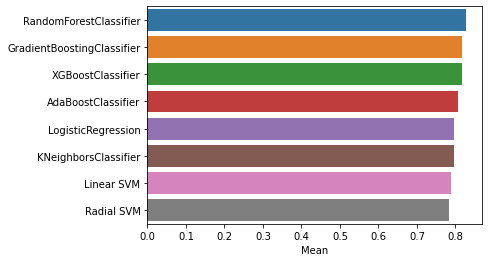

In [241]:
sns.barplot(res.Mean, res.index)

In [242]:
gb_params = [\
    {"n_estimators": [230, 250, 270],
     "max_depth": [1, 2, 4],
     "learning_rate": [0.01, 0.02, 0.05]}]
clf_gb = GridSearchCV(GradientBoostingClassifier(), gb_params)
clf_gb.fit(new_train, y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.01, 0.02, 0.05],
                          'max_depth': [1, 2, 4],
                          'n_estimators': [230, 250, 270]}])

In [243]:
print(clf_gb.best_score_, clf_gb.best_estimator_)

0.8305442219571904 GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=270)


In [245]:
param_rfc = { 
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}
clf_rfc = GridSearchCV(RandomForestClassifier(), param_rfc, cv=cv)
clf_rfc.fit(new_train, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [246]:
print(clf_rfc.best_score_, clf_rfc.best_estimator_)

0.830525390747599 RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=300)


In [252]:
best_alg = clf_rfc.best_estimator_
best_alg.fit(new_train, y)
pred_rfc = best_alg.predict(new_test)

In [253]:
print(pred_rfc)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
output = pd.DataFrame({'PassengerId': pas_id, 'Survived': pred_rfc})
output.to_csv('submission_9.csv', index=False)